<a href="https://colab.research.google.com/github/diego-souz/python_graficos_exemplos/blob/main/Campeonato_Brasileiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Campeões do Campeonato Brasileiro e suas Estatísticas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

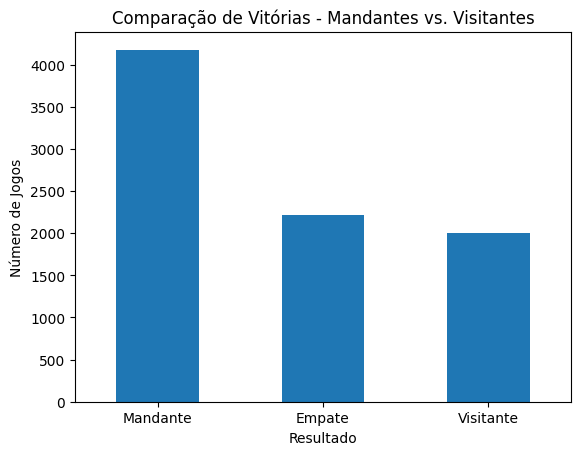

In [ ]:
# 1. Análise de Vitórias de Mandantes e Visitantes

# Carregar o dataframe
df_full = pd.read_csv("campeonato-brasileiro-full.csv")

def substituir_vencedor(row):
    if row['vencedor'] == row['mandante']:
        return 'Mandante'
    elif row['vencedor'] == row['visitante']:
        return 'Visitante'
    else:
        return 'Empate'

df_full['resultado'] = df_full.apply(substituir_vencedor, axis=1)

# Contar vitórias e plotar gráfico de barras
vitorias = df_full['resultado'].value_counts()
vitorias.plot(kind='bar', rot=0)
plt.xlabel("Resultado")
plt.ylabel("Número de Jogos")
plt.title("Comparação de Vitórias - Mandantes vs. Visitantes")
plt.show()

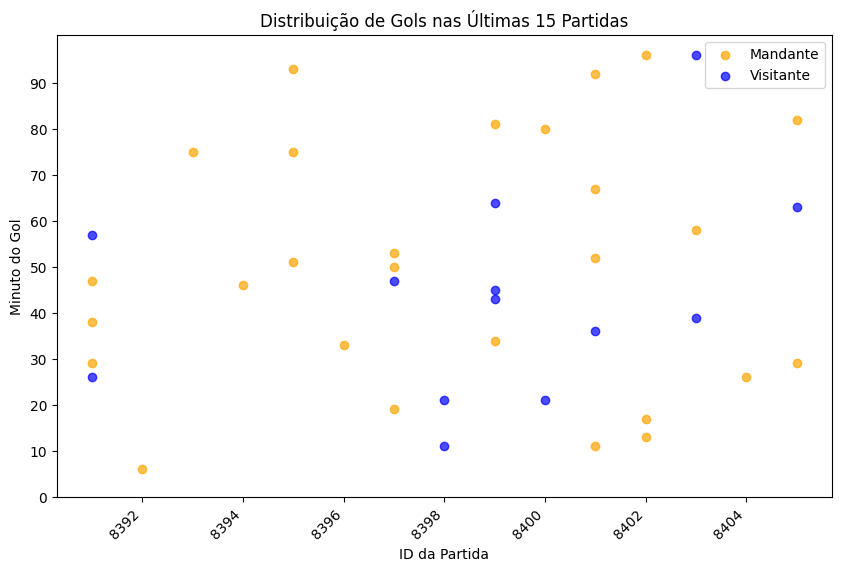

In [ ]:
# 2. Analyzing Goals and Plotting Goal Distribution

df_gols = pd.read_csv("campeonato-brasileiro-gols.csv")
df_gols.rename(columns={"partida_id": "ID"}, inplace=True)

def get_mandante_visitante(row):
  """Determines if a goal was scored by the mandante or visitante team."""
  match_row = df_full[df_full['ID'] == row['ID']]
  if row['clube'] == match_row['mandante'].values[0]:
    return 'Mandante'
  else:
    return 'Visitante'

df_gols['mandante_visitante'] = df_gols.apply(get_mandante_visitante, axis=1)

def process_minutos(minuto):
  """Handles minutes with '+' symbol by summing the values before and after it."""
  if '+' in minuto:
    parts = minuto.split('+')
    return int(parts[0]) + int(parts[1])
  else:
    return int(minuto)

df_gols['minuto'] = df_gols['minuto'].apply(process_minutos)

last_15_matches = df_gols['ID'].unique()[-15:]
df_plot = df_gols[df_gols['ID'].isin(last_15_matches)]

plt.figure(figsize=(10, 6))
groups = df_plot.groupby('mandante_visitante')
colors = {'Mandante': 'orange', 'Visitante': 'blue'}
for name, group in groups:
    plt.scatter(group['ID'], group['minuto'], label=name, color=colors[name], alpha=0.7)
plt.xlabel("ID da Partida")
plt.ylabel("Minuto do Gol")
plt.title("Distribuição de Gols nas Últimas 15 Partidas")
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 100, 10))
plt.legend()
plt.show()